In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
#Give dataset path
train_path = '../input/cancer/Data/train'
test_path = '../input/cancer/Data/validation'

In [4]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [5]:
for layer in vgg.layers:
  layer.trainable = False

In [6]:
folders = glob('../input/cancer/Data/train/*')
print(len(folders))

2


In [7]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [9]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [10]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [11]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5022 images belonging to 2 classes.


In [12]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5022 images belonging to 2 classes.


In [15]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='TL.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=10,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/20
10/10 - 19s - loss: 1.5074 - accuracy: 0.7906 - val_loss: 1.2866 - val_accuracy: 0.8242

Epoch 00001: val_loss improved from inf to 1.28663, saving model to TL.h5
Epoch 2/20
10/10 - 19s - loss: 1.6155 - accuracy: 0.8062 - val_loss: 1.7129 - val_accuracy: 0.7939

Epoch 00002: val_loss did not improve from 1.28663
Epoch 3/20
10/10 - 18s - loss: 1.7708 - accuracy: 0.8000 - val_loss: 1.2380 - val_accuracy: 0.8408

Epoch 00003: val_loss improved from 1.28663 to 1.23800, saving model to TL.h5
Epoch 4/20
10/10 - 17s - loss: 1.3169 - accuracy: 0.8188 - val_loss: 1.3606 - val_accuracy: 0.8350

Epoch 00004: val_loss did not improve from 1.23800
Epoch 5/20
10/10 - 17s - loss: 1.1278 - accuracy: 0.8625 - val_loss: 1.5184 - val_accuracy: 0.8271

Epoch 00005: val_loss did not improve from 1.23800
Epoch 6/20
10/10 - 19s - loss: 1.2784 - accuracy: 0.8719 - val_loss: 1.1427 - val_accuracy: 0.8584

Epoch 00006: val_loss improved from 1.23800 to 1.14268, saving model to TL.h5
Epoch 7/20
10/10 

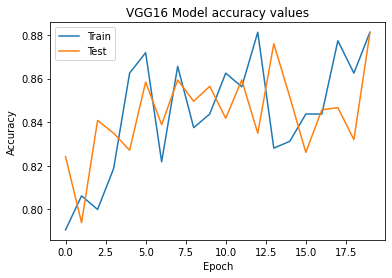

In [16]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('VGG16 Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()